In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sonar=pd.read_csv('sonardataset.csv')
print(sonar)

     Attribute-1  Attribute-2  Attribute-3  Attribute-4  Attribute-5  \
0         0.0200       0.0371       0.0428       0.0207       0.0954   
1         0.0453       0.0523       0.0843       0.0689       0.1183   
2         0.0262       0.0582       0.1099       0.1083       0.0974   
3         0.0100       0.0171       0.0623       0.0205       0.0205   
4         0.0762       0.0666       0.0481       0.0394       0.0590   
..           ...          ...          ...          ...          ...   
203       0.0187       0.0346       0.0168       0.0177       0.0393   
204       0.0323       0.0101       0.0298       0.0564       0.0760   
205       0.0522       0.0437       0.0180       0.0292       0.0351   
206       0.0303       0.0353       0.0490       0.0608       0.0167   
207       0.0260       0.0363       0.0136       0.0272       0.0214   

     Attribute-6  Attribute-7  Attribute-8  Attribute-9  Attribute-10  ...  \
0         0.0986       0.1539       0.1601       0.3109  

In [3]:
sonar.notnull().sum()

Attribute-1     208
Attribute-2     208
Attribute-3     208
Attribute-4     208
Attribute-5     208
               ... 
Attribute-57    208
Attribute-58    208
Attribute-59    208
Attribute-60    208
Target          208
Length: 61, dtype: int64

In [4]:
sonar.describe()

,Attribute-1,Attribute-2,Attribute-3,Attribute-4,Attribute-5,Attribute-6,Attribute-7,Attribute-8,Attribute-9,Attribute-10,...,Attribute-51,Attribute-52,Attribute-53,Attribute-54,Attribute-55,Attribute-56,Attribute-57,Attribute-58,Attribute-59,Attribute-60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


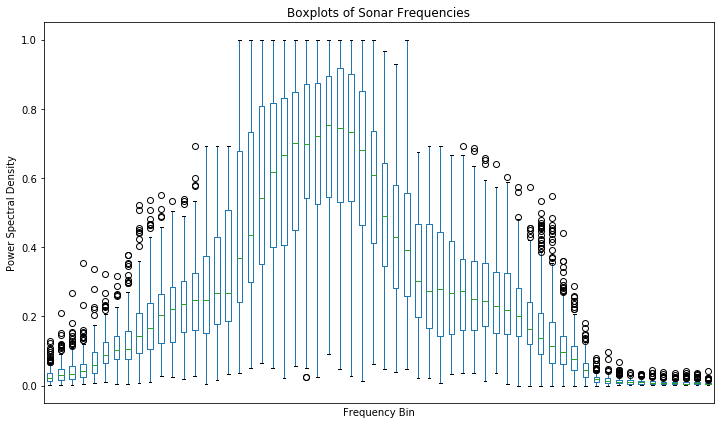

In [9]:
sonar.plot.box(figsize=(12,7), xticks=[])
plt.title('Boxplots of Sonar Frequencies')
plt.xlabel('Frequency Bin')
plt.ylabel('Power Spectral Density')
plt.show()

In [10]:
#lets find the base line accuracy
sonar['Target'].value_counts(normalize=True)

# the base line model says 53% we are getting the signal from M->mine (metal cylinder)

M    0.533654
R    0.466346
Name: Target, dtype: float64

In [14]:
# here the target variable which is classes: "R"->rock and "M"->mine (metal cylinder) has only two values
# lets encode these values using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sonar['Target']=le.fit_transform(sonar['Target'])
sonar.head(10)

#so here "R"->rock->1, "M"->mine (metal cylinder)->0

,Attribute-1,Attribute-2,Attribute-3,Attribute-4,Attribute-5,Attribute-6,Attribute-7,Attribute-8,Attribute-9,Attribute-10,...,Attribute-52,Attribute-53,Attribute-54,Attribute-55,Attribute-56,Attribute-57,Attribute-58,Attribute-59,Attribute-60,Target
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.143148,0.148506,0.270714,0.191529,...,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195,1
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.195238,0.298696,0.287957,0.252469,...,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390,1
2,0.025863,0.056569,0.104270,0.102827,0.092944,0.205387,0.217608,0.319980,0.444558,0.482056,...,0.022935,0.016464,0.009455,0.017840,0.024107,0.031111,0.016267,0.009455,0.007770,1
3,0.009950,0.016955,0.060436,0.020293,0.020293,0.036139,0.104180,0.120091,0.058080,0.119027,...,0.012027,0.003594,0.014889,0.008464,0.007273,0.004988,0.004390,0.003992,0.011632,1
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.114132,0.220500,0.304834,0.368732,...,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356,1
5,0.028199,0.044304,0.027323,0.017250,0.037681,0.094401,0.113418,0.168307,0.191033,0.265360,...,0.004490,0.001399,0.003793,0.001299,0.008861,0.005684,0.002696,0.005087,0.006181,1
6,0.031208,0.091302,0.124074,0.131730,0.154779,0.157858,0.070552,0.131116,0.189214,0.301067,...,0.019901,0.024497,0.013015,0.006976,0.013706,0.009158,0.014199,0.003594,0.010247,1
7,0.050598,0.053351,0.080842,0.031402,0.109572,0.088194,0.097762,0.059495,0.136714,0.249824,...,0.008067,0.011929,0.004490,0.012027,0.009653,0.008464,0.004689,0.004789,0.005286,1
8,0.022055,0.036814,0.047265,0.046406,0.062693,0.057419,0.072600,0.009752,0.066162,0.138631,...,0.014396,0.012719,0.014396,0.005783,0.004888,0.006479,0.009257,0.005883,0.002198,1
9,0.016267,0.017152,0.034112,0.006976,0.018527,0.064945,0.100388,0.067378,0.091850,0.024790,...,0.008960,0.022055,0.017742,0.008365,0.006777,0.003195,0.003494,0.005584,0.003992,1


In [23]:
# separating the input and output/target variables
import numpy as np
x=sonar.drop(columns=['Target'],axis=1)
y=sonar[['Target']]

print(x.shape)
print(y.shape)

(208, 60)
(208, 1)


In [24]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(166, 60) (42, 60)
(166, 1) (42, 1)


In [35]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.svm import SVC
sv=SVC(kernel='poly')
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 3)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=240,random_state=49)

In [36]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gnb))
models.append(('MultinomialNB',mnb))
models.append(('RandomForestClassifier',rf))

In [37]:
#lets import all the classification outputs
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.8333333333333334


Cross Value Score: 0.6435714285714286


roc_auc_score: 0.8272727272727273


Classification Report:               precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



Confusion Matrix:
 [[21  1]
 [ 6 14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************ SVC **********************


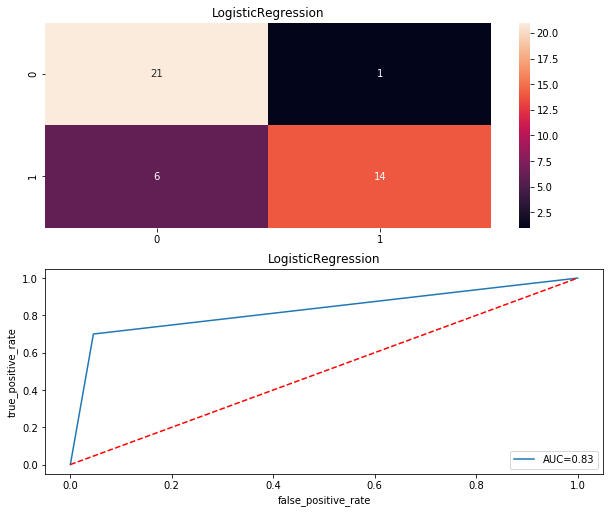

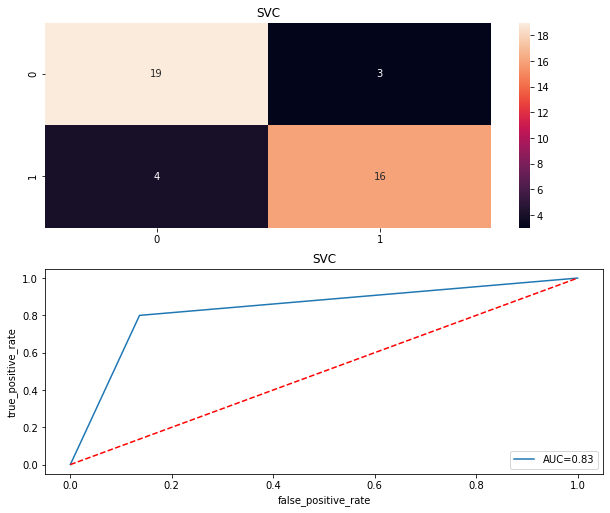

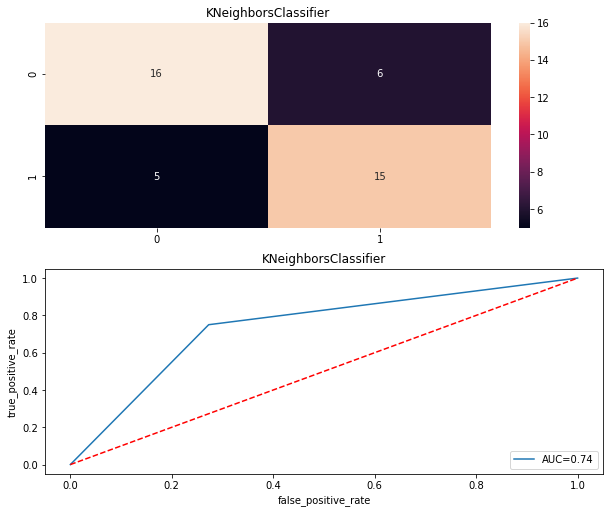

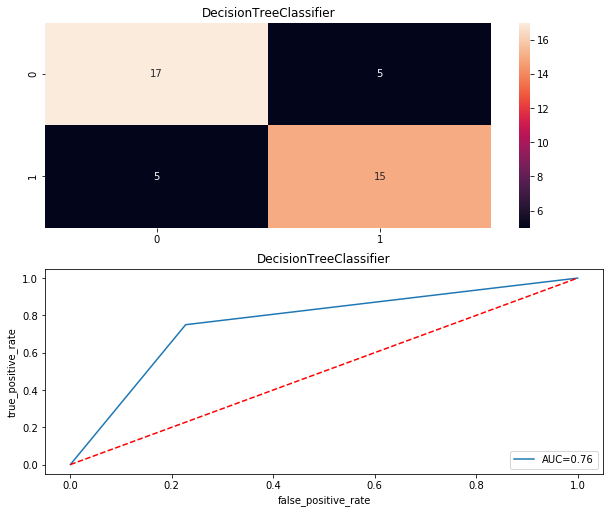

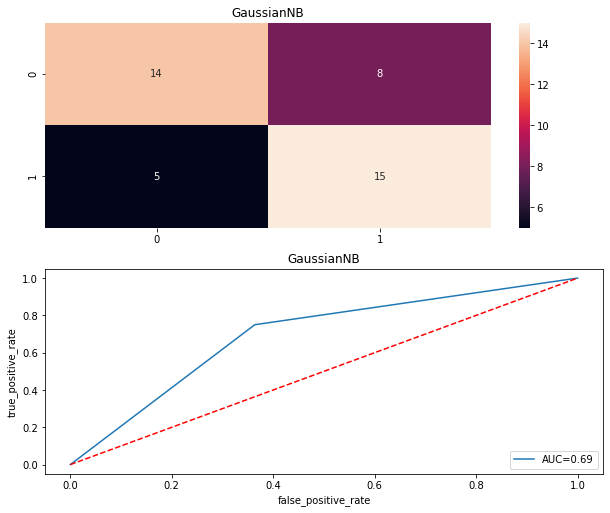

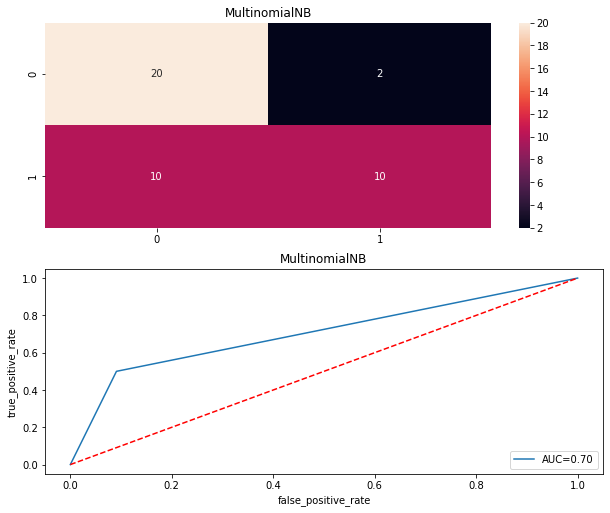

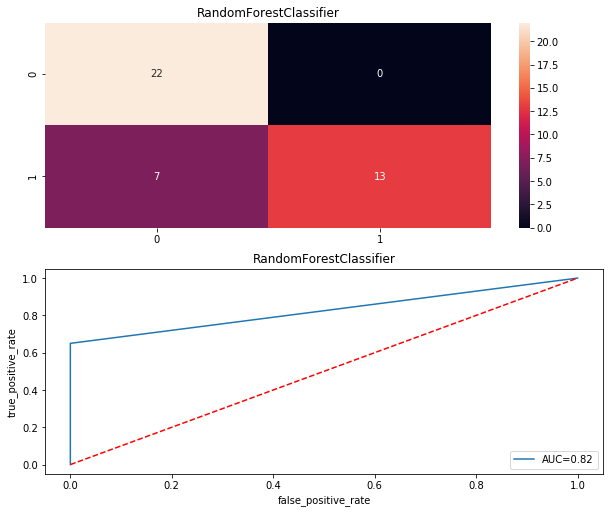

In [38]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score:',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('true_positive_rate')
    plt.xlabel('false_positive_rate')
    print('\n\n')

In [39]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs,'Roc_Auc_Curve':rocscore})
print(result)

                    Model  Accuracy_Score  Cross_Value_Score  Roc_Auc_Curve
0      LogisticRegression       83.333333          64.357143      82.727273
1                     SVC       83.333333          66.904762      83.181818
2    KNeighborsClassifier       73.809524          59.547619      73.863636
3  DecisionTreeClassifier       76.190476          60.071429      76.136364
4              GaussianNB       69.047619          62.190476      69.318182
5           MultinomialNB       71.428571          62.452381      70.454545
6  RandomForestClassifier       83.333333          72.619048      82.500000


In [41]:
#so here by looking to all model RandomForestClassifier is the best model, so we will fianalise this model
#so saving the final model
from sklearn.externals import joblib
#save the model as joblib in a file
joblib.dump(rf,'rf_sonar.obj')

['rf_sonar.obj']

In [42]:
# load the model from the file
rf_from_joblib=joblib.load('rf_sonar.obj')

In [43]:
#Use the loaded model to make predictionsdtc_from_joblib.predict(x_test)
rf_from_joblib.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)